In [5]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "experiments"

# read text files into pandas
files = os.listdir(path)
files = [f for f in files if f.endswith('.txt')]
files = [os.path.join(path, f) for f in files]

dfs = {}

for f in files:
    df = pd.read_csv(f, sep=' ', header=None)
    # drop 0th and 2nd columns
    df = df.drop([0, 2], axis=1)
    # rename columns
    df.columns = ['train_acc', 'test_acc']
    # perform some operations on the columns
    df['train_acc'] = df['train_acc'].str.replace('acc:', '').astype(float)
    df['test_acc'] = df['test_acc'].str.replace('acc:', '').astype(float)
    # get the name of the file
    name = os.path.basename(f).split('.')[0]
    # add to dictionary
    dfs[name] = df
    


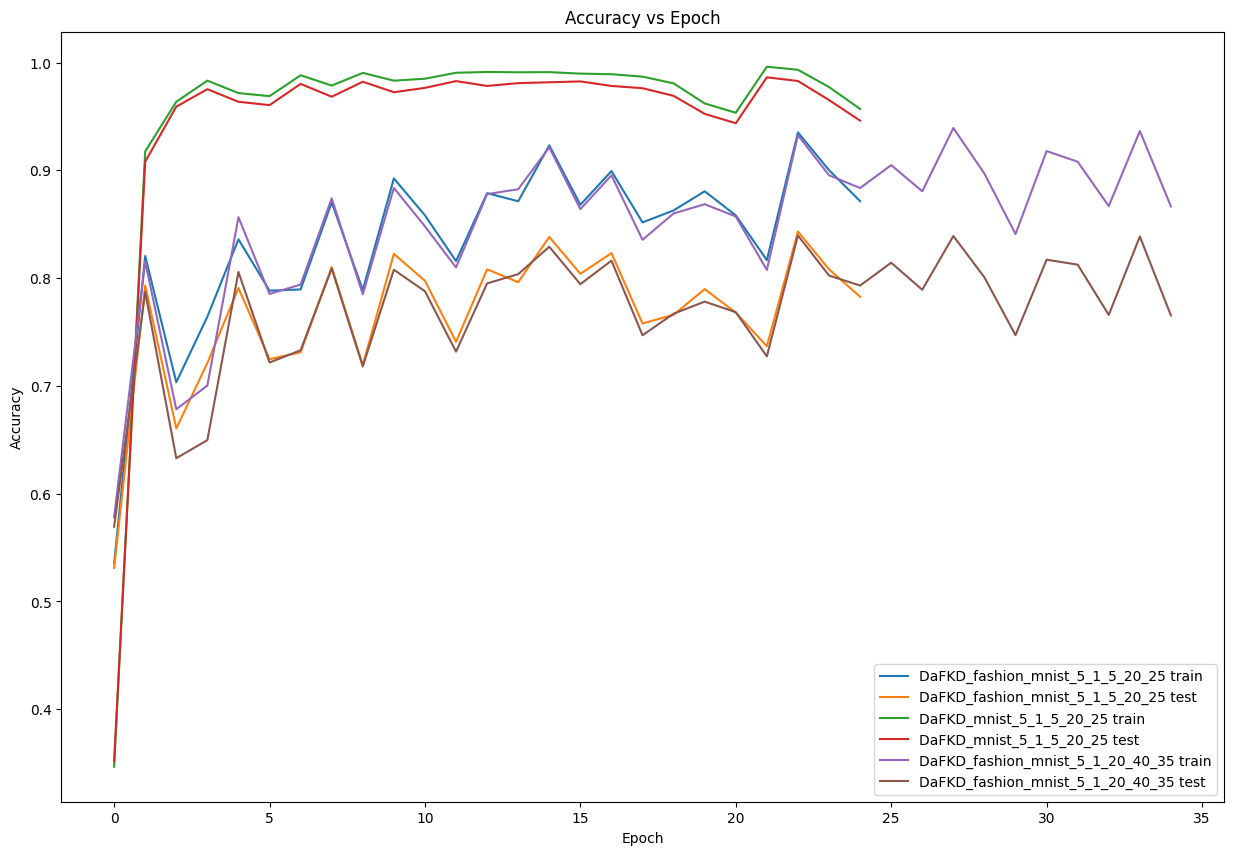

In [7]:
# plot the data
fig, ax = plt.subplots(figsize=(15, 10))
for name, df in dfs.items():
    ax.plot(df['train_acc'], label=name + ' train')
    ax.plot(df['test_acc'], label=name + ' test')
ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs Epoch')
plt.show()

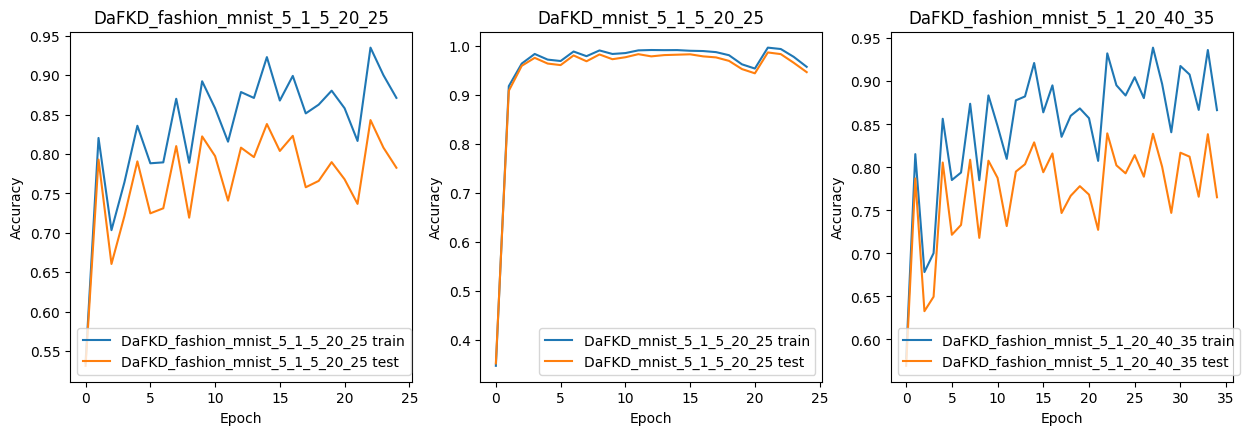

In [8]:
plt.figure(figsize=(15, 10))
for enumerate, (name, df) in enumerate(dfs.items()):
    plt.subplot(2, 3, enumerate+1)
    plt.plot(df['train_acc'], label=name + ' train')
    plt.plot(df['test_acc'], label=name + ' test')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(name)
plt.show()